<left>
<table style="margin-top:0px; margin-left:0px;">
<tr>
  <td><img src="https://raw.githubusercontent.com/worm-portal/WORM-Figures/master/style/worm.png" alt="WORM" title="WORM" width=50/></td>
  <td><h1 style=font-size:30px>Aqueous Organic Estimator (AqOrg) feature demo</h1><br />
</tr>
</table>
</left>

In [9]:
from AqOrg import Estimate

### Single compound estimation

You can estimate the properties of a neutral organic molecule from its name alone. AqOrg will search the online PubChem database for a match and then attempt to estimate its properties using group additivity theory. Some functional groups are not yet supported.

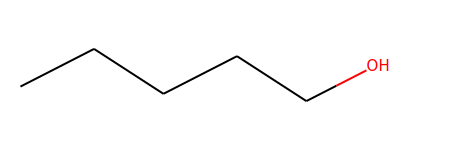

In [18]:
pentanol = Estimate("pentanol")

Look up the molecule's OBIGT table of estimated values.

In [19]:
pentanol.OBIGT

,abbrv,formula,state,ref1,ref2,date,E_units,G,H,S,Cp,V,a1.a,a2.b,a3.c,a4.d,c1.e,c2.f,omega.lambda,z.T
name,,,,,,,,,,,,,,,,,,,,
pentanol,C5H12O,C5H12O,aq,AqOrg,GrpAdd,12/03/2021 09:53:34,J,-156580.0,-363310.0,221.980182,528.305433,102.11,85.81333,60.774463,100.41907,-39.642369,498.412926,12.07798,-0.580589,0


Look up individual parameters.

In [20]:
pentanol.Cp, pentanol.omega, pentanol.Sh, pentanol.Sh_err

(528.3054331361576, -0.5805886985627096, -179.7, 5.6)

In [22]:
pentanol.group_matches

,C-[CX4H3],C-[CX4H2]-C,O-[CX4H2]-C,C-[OX2H],formula
pentanol,1,3,1,1,C5H12O


Specify known values for properties and parameters. See which ones can be defined with `help(AqOrg.Estimate)`. Do not show a picture of the molecule with `show=False`.

In [13]:
pentanol = Estimate("pentanol", Gh=-11.11, Hig=-294.56, Cpaq=535, show=False)
pentanol.OBIGT

,abbrv,formula,state,ref1,ref2,date,E_units,G,H,S,Cp,V,a1.a,a2.b,a3.c,a4.d,c1.e,c2.f,omega.lambda,z.T
name,,,,,,,,,,,,,,,,,,,,
pentanol,C5H12O,C5H12O,aq,AqOrg,GrpAdd,12/03/2021 09:51:43,J,-156710.0,-359110.0,236.503074,535.0,102.11,85.837993,60.710613,100.361467,-39.623208,505.369346,11.96761,-0.576511,0


Perform simple group matching with `test=True`.

In [14]:
Estimate("pentanol", test=True, show=False)

{'C-[CX4H3]': 1, 'C-[CX4H2]-C': 3, 'O-[CX4H2]-C': 1, 'C-[OX2H]': 1, 'formula': 'C5H12O'}


### Multi-compound estimation

In [15]:
import pandas as pd
mols = ["pentanol", "hexanol", "heptanol"]
OBIGT = pd.DataFrame()
for mol in mols:
    OBIGT = OBIGT.append(Estimate(mol, show=False).OBIGT)
OBIGT

,abbrv,formula,state,ref1,ref2,date,E_units,G,H,S,Cp,V,a1.a,a2.b,a3.c,a4.d,c1.e,c2.f,omega.lambda,z.T
name,,,,,,,,,,,,,,,,,,,,
pentanol,C5H12O,C5H12O,aq,AqOrg,GrpAdd,12/03/2021 09:51:48,J,-156580.0,-363310.0,221.980182,528.305433,102.11,85.813330,60.774463,100.419070,-39.642369,498.412926,12.07798,-0.580589,0
hexanol,C6H14O,C6H14O,aq,AqOrg,GrpAdd,12/03/2021 09:51:48,J,-147480.0,-387470.0,246.845596,613.200273,117.72,98.783255,70.450358,119.933082,-46.711667,581.936497,12.65530,-0.602091,0
heptanol,C7H16O,C7H16O,aq,AqOrg,GrpAdd,12/03/2021 09:51:49,J,-138380.0,-411630.0,271.711009,698.095114,133.33,111.713735,80.228368,139.740061,-53.857142,665.457379,13.23262,-0.623885,0


### Load a custom table of group contribution values

AqOrg has a built-in table of group contribution values. If you want to replace it with your own custom table, specify the filename of your CSV table in ```group_data```. In this example, custom_groups.csv is no different than the default database so you should not expect the estimated values to be any different than before.

In [17]:
pentanol = Estimate("pentanol", group_data="custom_groups.csv", show=False)
pentanol.OBIGT

,abbrv,formula,state,ref1,ref2,date,E_units,G,H,S,Cp,V,a1.a,a2.b,a3.c,a4.d,c1.e,c2.f,omega.lambda,z.T
name,,,,,,,,,,,,,,,,,,,,
pentanol,C5H12O,C5H12O,aq,AqOrg,GrpAdd,12/03/2021 09:52:55,J,-156580.0,-363310.0,221.980182,528.305433,102.11,85.81333,60.774463,100.41907,-39.642369,498.412926,12.07798,-0.580589,0
